In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

In [7]:
size = 200
true_intercept = 1
true_slope = 2
x = np.linspace(0,1,size)
true_regression_line = true_intercept+true_slope*x
y = true_regression_line + np.random.normal(scale=.5, size= size)
data = dict(x=x, y=y)

In [8]:
import pymc3 as pm
import seaborn as sns

In [9]:
with pm.Model() as model:
    # a priori
    sigma = pm.HalfCauchy('sigma', beta=10, testval=.1)
    intercept = pm.Normal('Intercept', mu=0, sd=20)
    x_coeff = pm.Normal('x', mu=0, sd=20)
    # likelihood
    likelihood = pm.Normal('y', mu=intercept+x_coeff*x, sd=sigma, observed=y)
    trace = pm.sample(3000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:07<00:00, 893.30draws/s]
The acceptance probability does not match the target. It is 0.8819656805014658, but should be close to 0.8. Try to increase the number of tuning steps.


<Figure size 504x504 with 0 Axes>

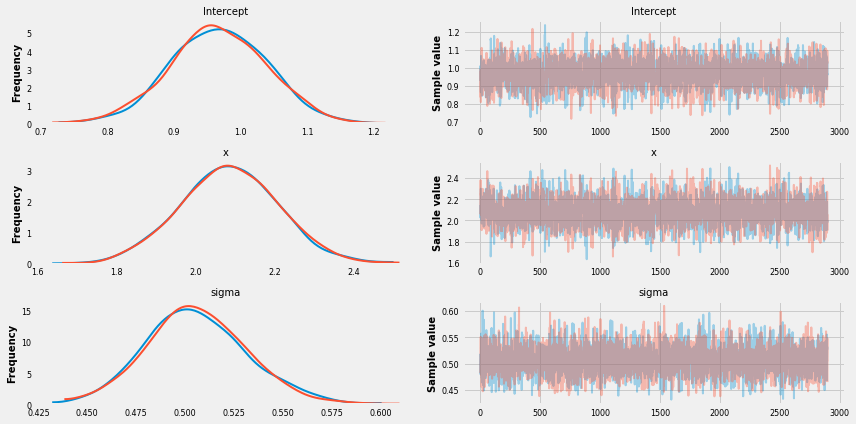

In [12]:
plt.figure(figsize=(7,7))
pm.traceplot(trace[100:])
plt.tight_layout()